### Driven Data Pump it Up Challenge:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
#Reading the df files and assigning them to variables - we have 2 csv files
training_label = pd.read_csv('data/training set labels.csv')
training_values_df = pd.read_csv('data/training set values.csv')

In [3]:
# Merge training_values_df and training_label dfs to have one df
train_df = pd.merge(training_values_df, training_label, on = "id")

In [4]:
# Deleting training_label df
del training_label

In [5]:
# Creating a copy of train df so making changes would not alter the initial dataset
df = train_df.copy()

In [6]:
df.shape

(59400, 41)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [8]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [9]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [10]:
#df[['funder','installer']].dropna().head(10)

In [11]:
df.status_group.count()

59400

In [12]:
# The count of each fuctional type of the pumps in status_group so that we will understand the functional scenario 
# of the pump status
df.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [13]:
functional_percent = (sum(df['status_group'] == 'functional') / df.status_group.count()) * 100
non_functional_percent = (sum(df['status_group'] == 'non functional') / df.status_group.count()) * 100
repair_percent = (sum(df['status_group'] == 'functional needs repair') / df.status_group.count()) * 100
print('Functional Pumps are: ' + str(round(functional_percent, 2)) + '%')
print('Non Functional Pumps are: ' + str(round(non_functional_percent, 2)) + '%')
print('Functional but Needs Repair Pumps are: ' + str(round(repair_percent, 2)) + '%')

Functional Pumps are: 54.31%
Non Functional Pumps are: 38.42%
Functional but Needs Repair Pumps are: 7.27%


In [14]:
df['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

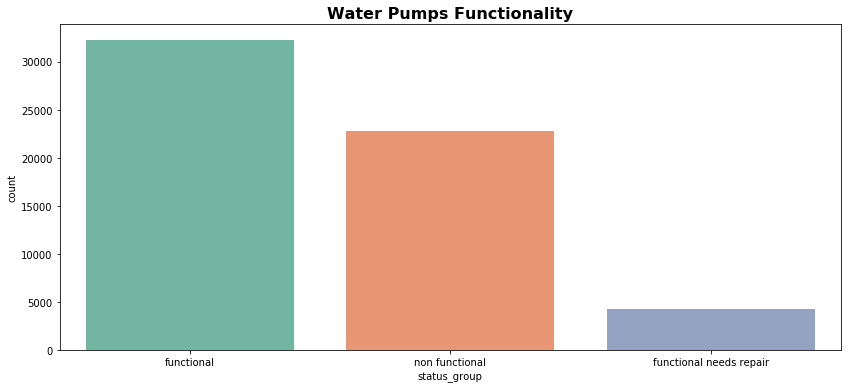

In [15]:
plt.figure(figsize=(14,6))
plt.title("Water Pumps Functionality",fontsize=16, fontweight='bold')
sns.countplot(x=df['status_group'], data=df, palette="Set2");

#### By the above figures, we can roughly estimate that there is 54.31% chance that if we take a random pump in the data to be a functional one.

In [16]:
num_feature_names = [
     'amount_tsh',
     'gps_height',
    'longitude',
    'latitude',
     'population',
    'construction_year'
]

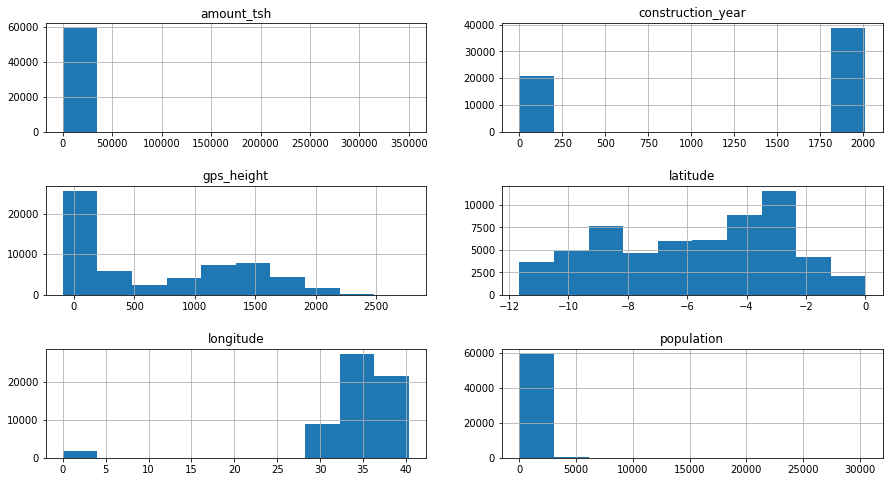

In [17]:
df.loc[:,num_feature_names].hist()
fig = plt.gcf()
fig.set_size_inches(15,8)
fig.subplots_adjust(wspace=0.2, hspace=0.5)

In [18]:
df.groupby(['status_group','construction_year']).size()

status_group    construction_year
functional      0                    10555
                1960                    24
                1961                     2
                1962                     7
                1963                    31
                1964                     7
                1965                    11
                1966                     6
                1967                    31
                1968                    22
                1969                    15
                1970                    99
                1971                    82
                1972                   178
                1973                    55
                1974                   234
                1975                   144
                1976                    85
                1977                    62
                1978                   426
                1979                    41
                1980                   258
                1981

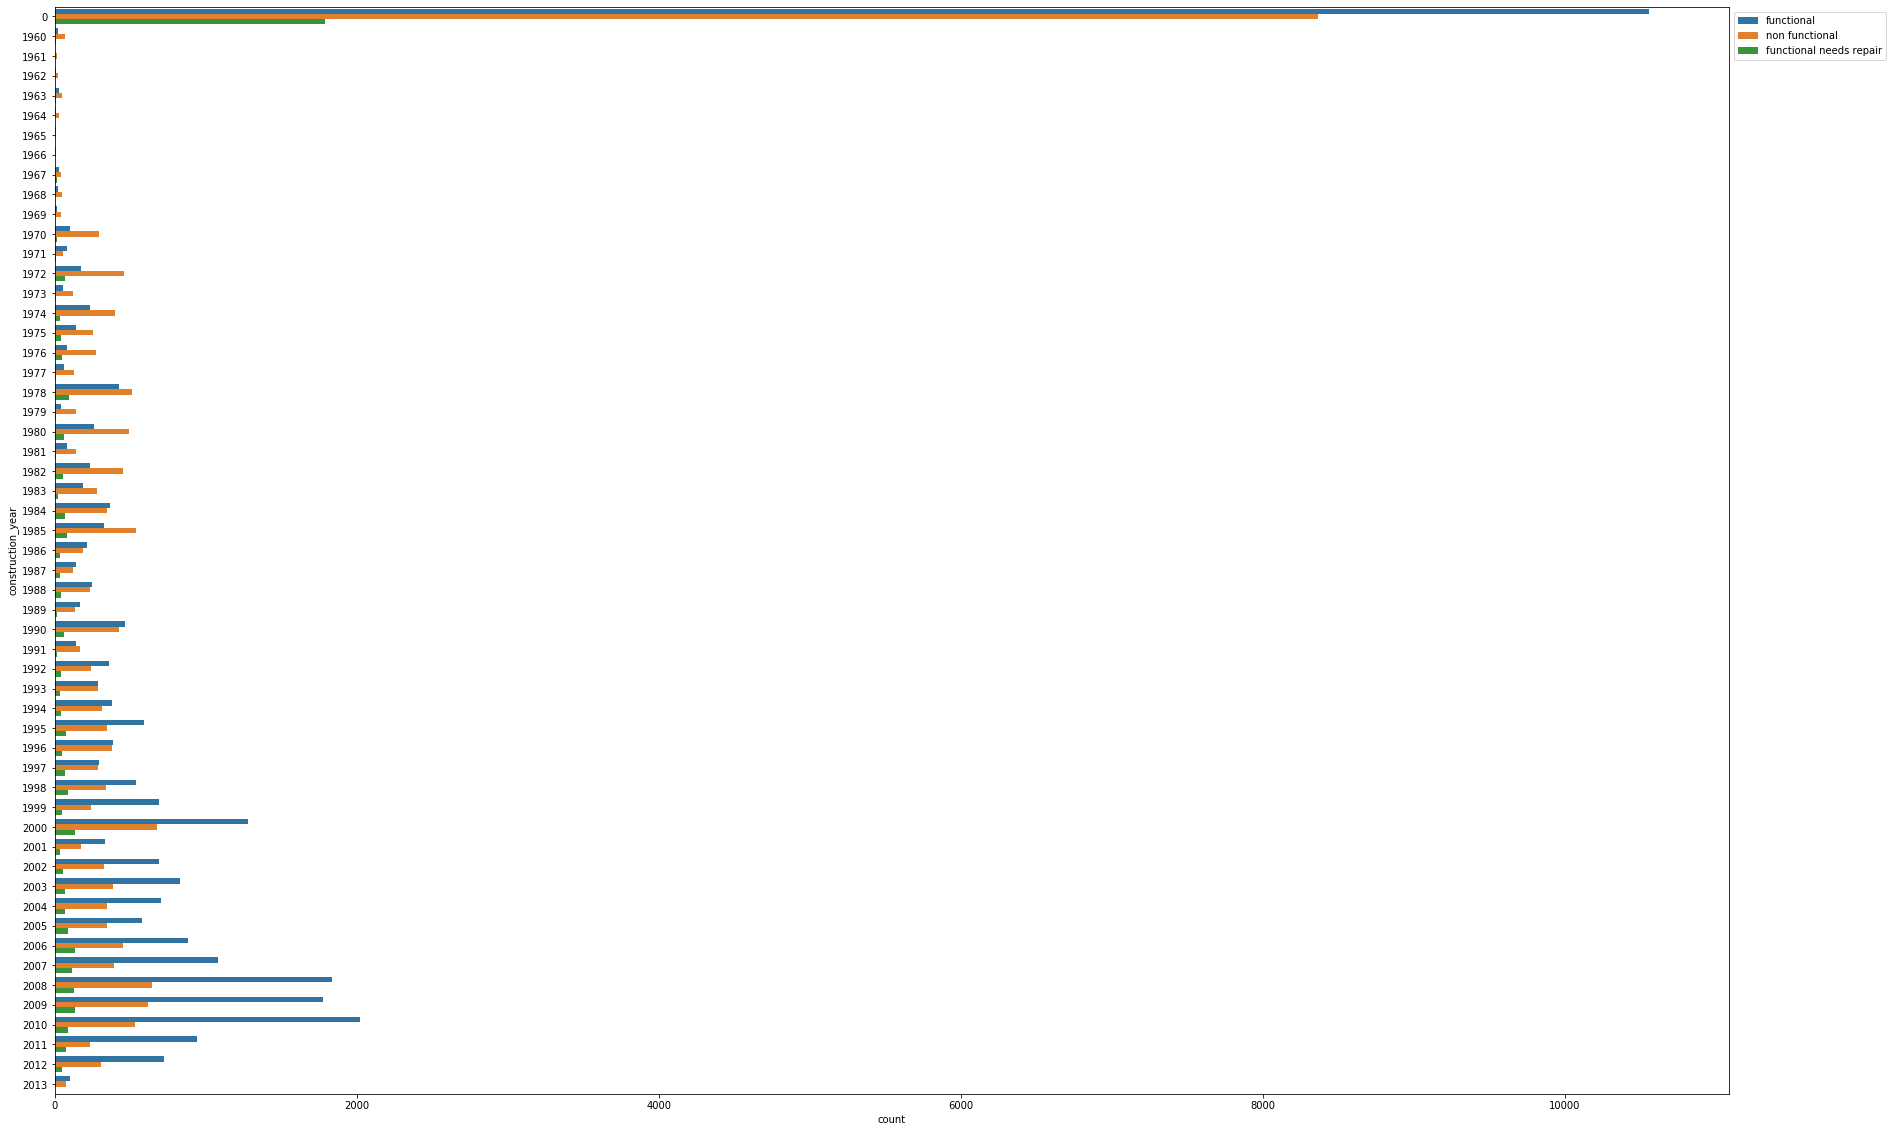

In [19]:
plt.figure(figsize=(30, 20))
sns.countplot(data=df,y='construction_year',hue='status_group')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [20]:
#plt.bar(x='construction_year', height=10)

In [21]:
#df.age.max()

In [22]:
#df.groupby([['quantity']], index=df['quantity'])#, columns=df['status_group'], aggfunc='count')

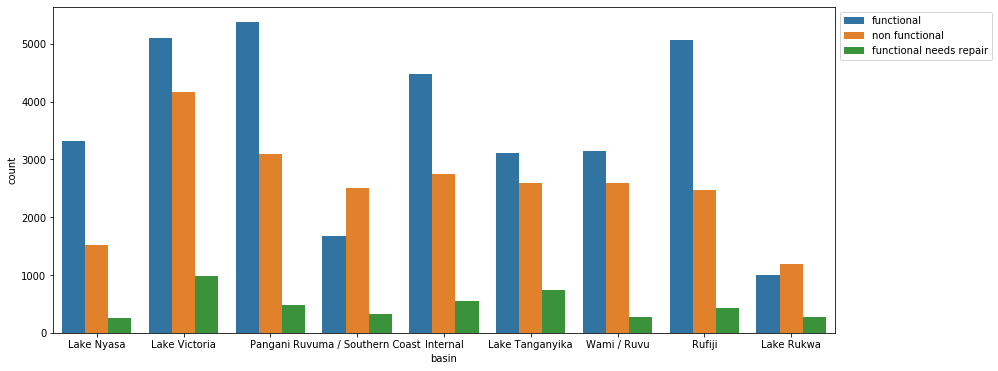

In [23]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='basin',hue='status_group')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [24]:
df[['quantity']].groupby(df['extraction_type']).size()

extraction_type
afridev                       1770
cemo                            90
climax                          32
gravity                      26780
india mark ii                 2400
india mark iii                  98
ksb                           1415
mono                          2865
nira/tanira                   8154
other                         6430
other - mkulima/shinyanga        2
other - play pump               85
other - rope pump              451
other - swn 81                 229
submersible                   4764
swn 80                        3670
walimi                          48
windmill                       117
dtype: int64

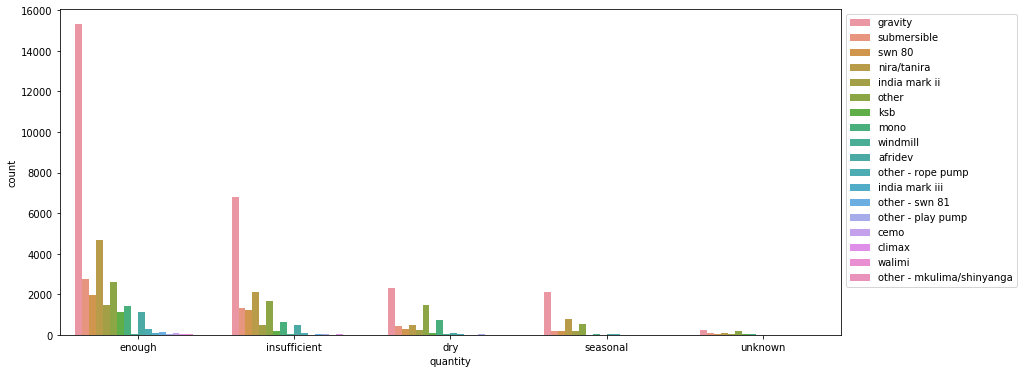

In [25]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='quantity',hue='extraction_type')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [26]:
df[df['quantity']=='dry'].groupby(df['extraction_type']).size()

extraction_type
afridev                79
gravity              2317
india mark ii         239
india mark iii          6
ksb                   108
mono                  739
nira/tanira           496
other                1473
other - play pump      35
other - rope pump      30
other - swn 81         12
submersible           424
swn 80                266
walimi                  2
windmill               20
dtype: int64

In [27]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [28]:
piv_df = df[['quantity', 'status_group', 'basin']]
piv_table = piv_df.pivot_table(index='quantity', columns='status_group', aggfunc='count')
piv_table

basin                                       
status_group functional functional needs repair non functional
quantity                                                      
dry                 157                      37           6052
enough            21648                    2400           9138
insufficient       7916                    1450           5763
seasonal           2325                     416           1309
unknown             213                      14            562

In [29]:
piv_df= df[['water_quality','status_group','basin']]
piv_table = piv_df.pivot_table(index='water_quality',columns='status_group', aggfunc='count')
piv_table

basin                                       
status_group       functional functional needs repair non functional
water_quality                                                       
coloured                246.0                    54.0          190.0
fluoride                151.0                    13.0           36.0
fluoride abandoned        6.0                     NaN           11.0
milky                   438.0                    14.0          352.0
salty                  2220.0                   225.0         2411.0
salty abandoned         174.0                    72.0           93.0
soft                  28760.0                  3904.0        18154.0
unknown                 264.0                    35.0         1577.0

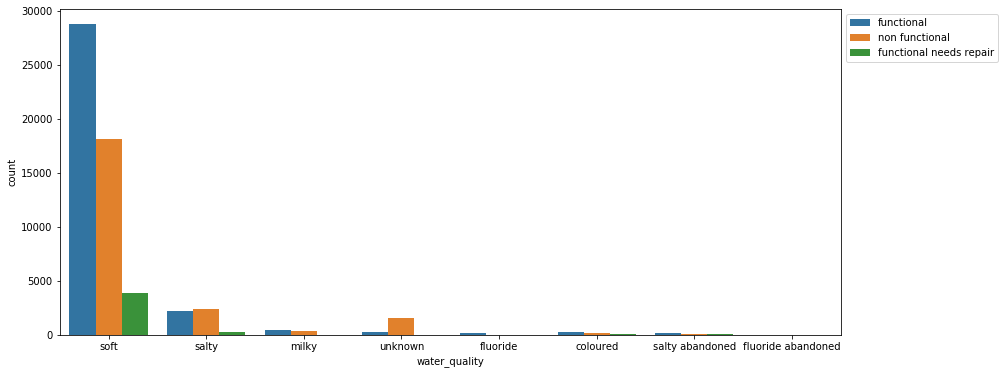

In [30]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='water_quality',hue='status_group')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

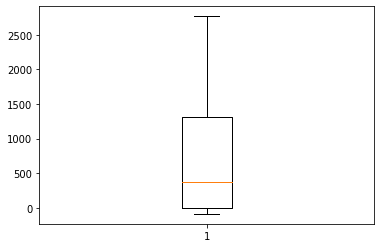

In [31]:
_ = plt.boxplot(df['gps_height'])

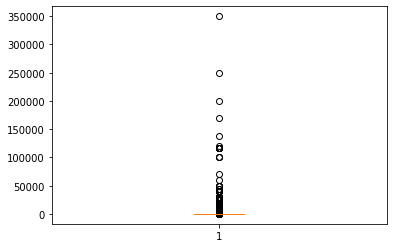

In [32]:
_ = plt.boxplot(df['amount_tsh'])

### Dropping The Features With Similar Representation of Data

In [33]:
# checking the amount_tsh column to see how many rows have 0's in them
len(df[df['amount_tsh'] == 0])

41639

In [34]:
df[df['gps_height'] == 0]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,...,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
12,36957,0.0,2012-10-14,World Vision,0,World vision,33.798106,-3.290194e+00,Pamba,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
14,53752,0.0,2012-10-20,Biore,0,WEDECO,34.364073,-3.629333e+00,Mwabasabi,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
21,6091,0.0,2013-02-10,Dwsp,0,DWE,0.000000,-2.000000e-08,Muungano,0,...,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,functional
27,20145,0.0,2011-07-11,Hesawa,0,DWE,31.104257,-1.735361e+00,Kwawilliam,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [35]:
df[df['gps_height'] == 0].groupby('status_group').size()

status_group
functional                 10469
functional needs repair     1763
non functional              8206
dtype: int64

In [36]:
#plt.figure()
#plt.subplot(111, projection="aitoff")
#plt.title("Aitoff")
#plt.grid(True)

In [37]:
# checking the population column to see how many rows have 0's in them
len(df[df['population'] == 0])

21381

In [38]:
len(df[df['construction_year'] == 0])

20709

In [39]:
len(df[df['longitude'] == 0])

1812

In [40]:
len(df[df['latitude'] == 0])

0

In [41]:
len(df[df['gps_height'] == 0])

20438

In [42]:
# We can see that there are 41639 0's in amount_tsh column. Since these 0's might cause some 
#issues later, we need to change them to NaN values and then replace the NaN values 
#with transform("mean") and transform("median") - This is also true for population and gps_height
df.population.min()
df['amount_tsh'].replace(0.0, np.nan, inplace=True)
df['gps_height'].replace(0.0, np.nan, inplace=True)
df['population'].replace(0.0, np.nan, inplace=True)

In [43]:
# checking to make sure all 0's have been changed to Null values
df.isnull().sum()

id                           0
amount_tsh               41639
date_recorded                0
funder                    3635
gps_height               20438
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population               21381
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [44]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,NaN,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,NaN,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,NaN,2011-07-13,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [45]:
df["gps_height"].fillna(df.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
df["gps_height"].fillna(df.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
df["gps_height"].fillna(df["gps_height"].mean(), inplace=True)
df["population"].fillna(df.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
df["population"].fillna(df.groupby(['region'])["population"].transform("median"), inplace=True)
df["population"].fillna(df["population"].median(), inplace=True)
df["amount_tsh"].fillna(df.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
df["amount_tsh"].fillna(df.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
df["amount_tsh"].fillna(df["amount_tsh"].median(), inplace=True)

In [46]:
# checking to make sure all Null values have been filled
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [47]:
df.groupby(['region','permit']).size()

region         permit
Arusha         False      255
               True      2650
Dar es Salaam  False      777
Dodoma         False     1212
               True       989
Iringa         False     2117
               True      3174
Kagera         False      795
               True      2521
Kigoma         False     1160
               True      1656
Kilimanjaro    False      445
               True      3796
Lindi          False      733
               True       813
Manyara        False       77
               True      1506
Mara           False      604
               True       998
Mbeya          False     1399
               True      2134
Morogoro       False       39
               True      3967
Mtwara         False      419
               True      1311
Mwanza         False      127
               True      2975
Pwani          False     1105
               True      1530
Rukwa          False      646
               True      1162
Ruvuma         False      840
               Tru

In [48]:
features=['amount_tsh', 'gps_height', 'population']
scaler = MinMaxScaler(feature_range=(0,20))
df[features] = scaler.fit_transform(df[features])
df[features].head(20)

,amount_tsh,gps_height,population
0,0.342846,10.349650,0.070822
1,0.011417,10.412587,0.182957
2,0.001417,5.426573,0.163284
3,0.002846,2.468531,0.037378
4,0.014274,8.024794,0.130496
5,0.001131,5.356490,0.000000
6,0.028560,10.076795,0.327224
7,0.028560,10.076795,0.327224
8,0.014274,8.024794,0.130496
9,0.014274,8.024794,0.130496


In [49]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

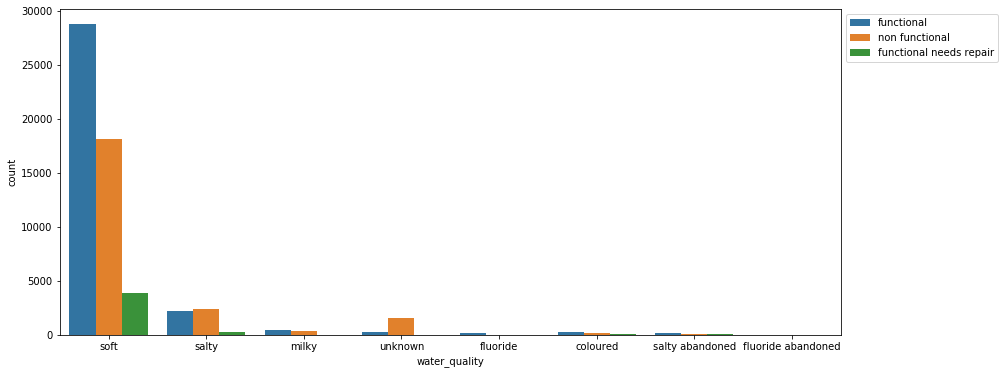

In [50]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='water_quality',hue='status_group')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
df.water_quality.value_counts()

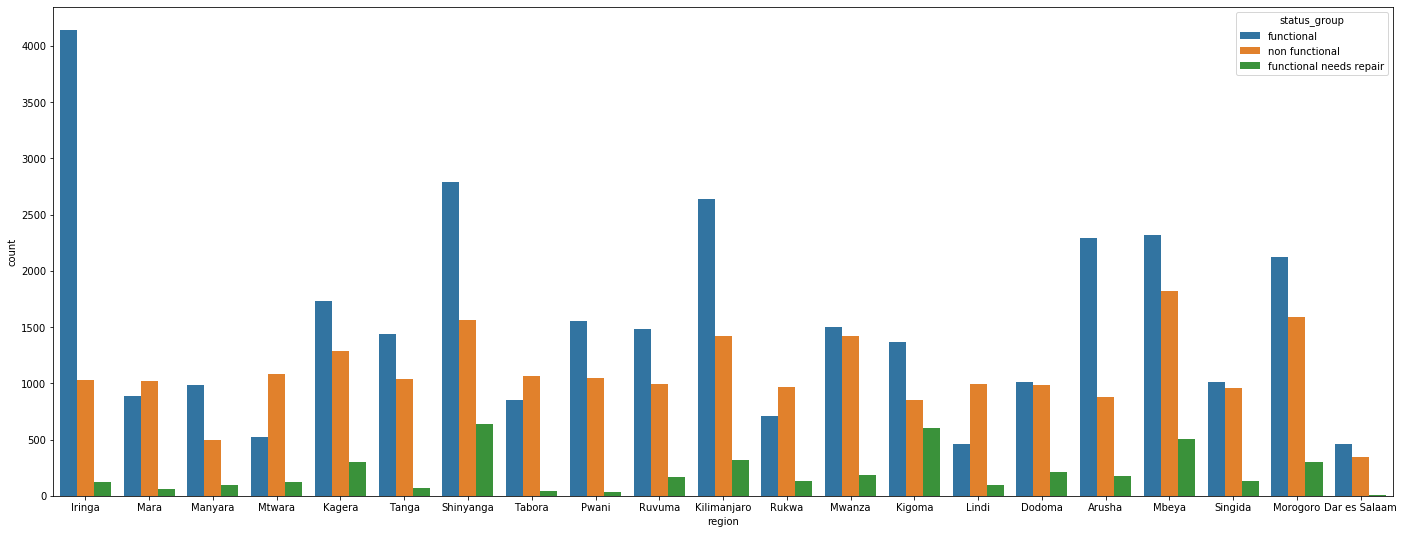

In [51]:
#looking at regions
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='region',hue='status_group')

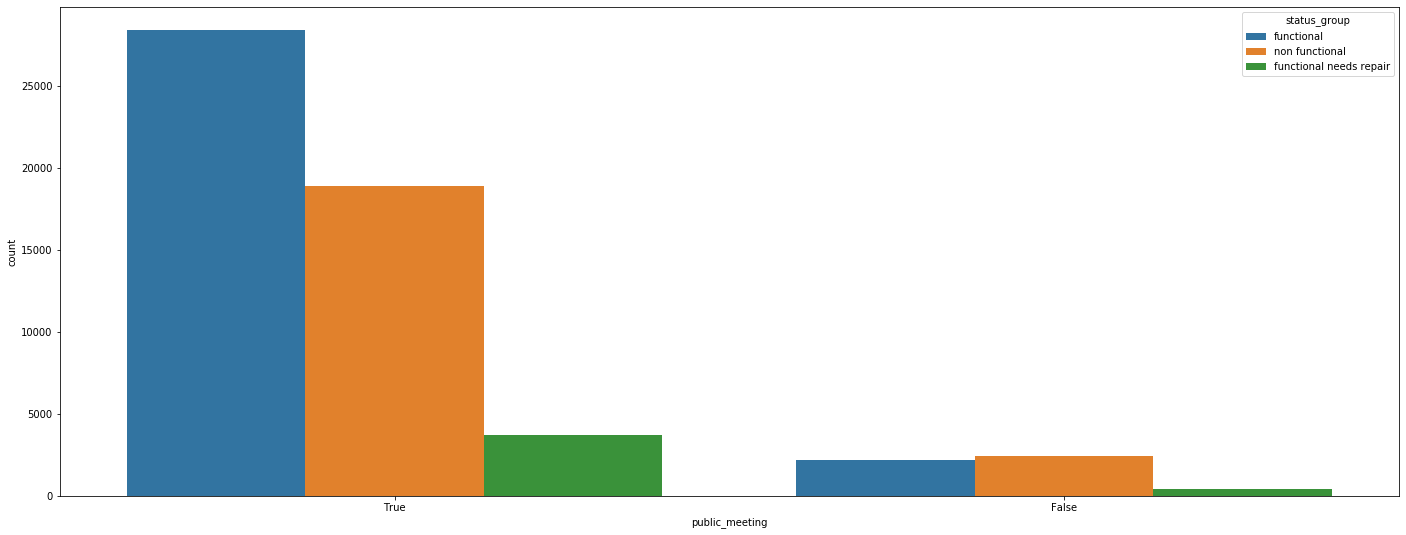

In [52]:
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='public_meeting',hue='status_group')

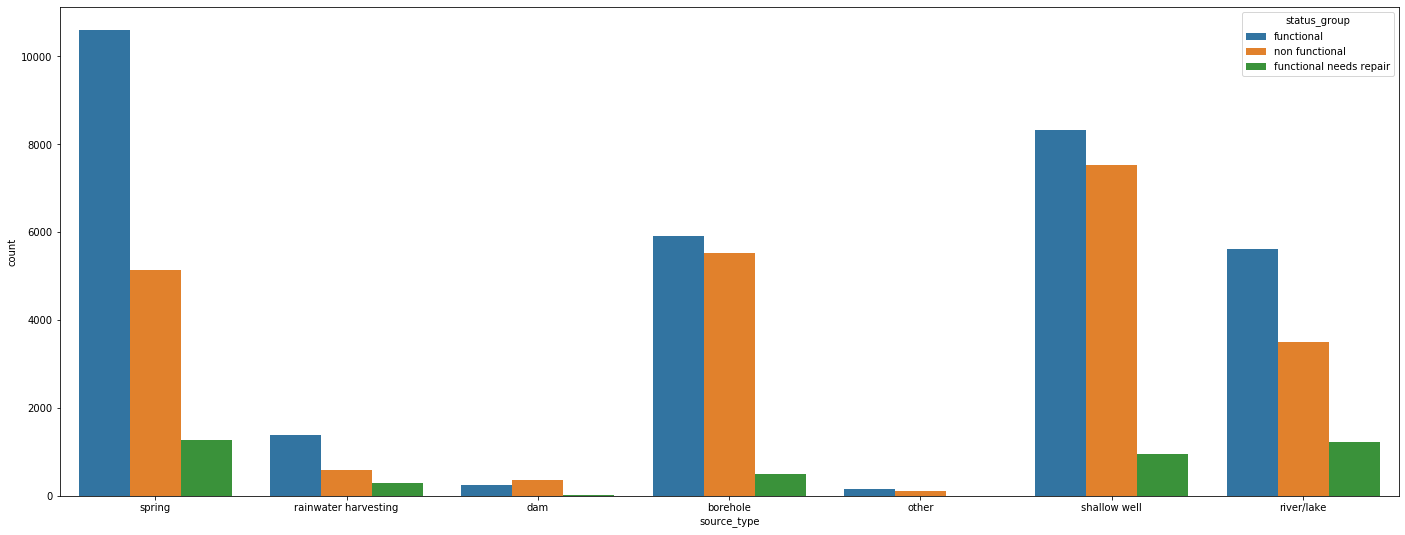

In [53]:
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='source_type',hue='status_group')

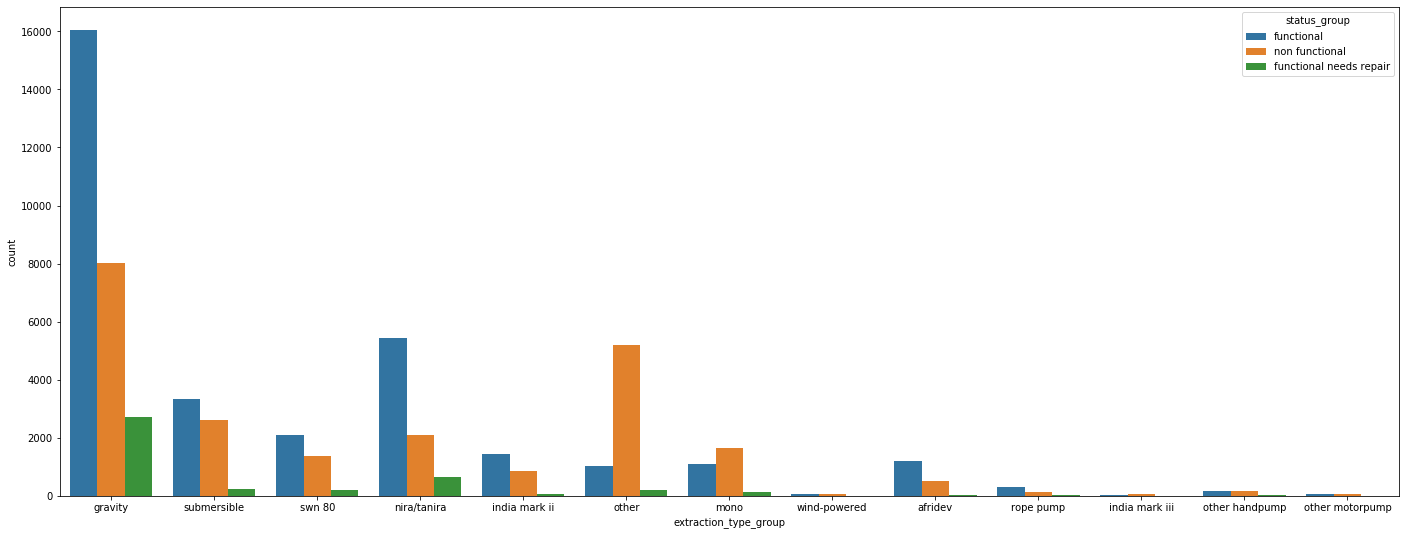

In [54]:
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='extraction_type_group',hue='status_group')

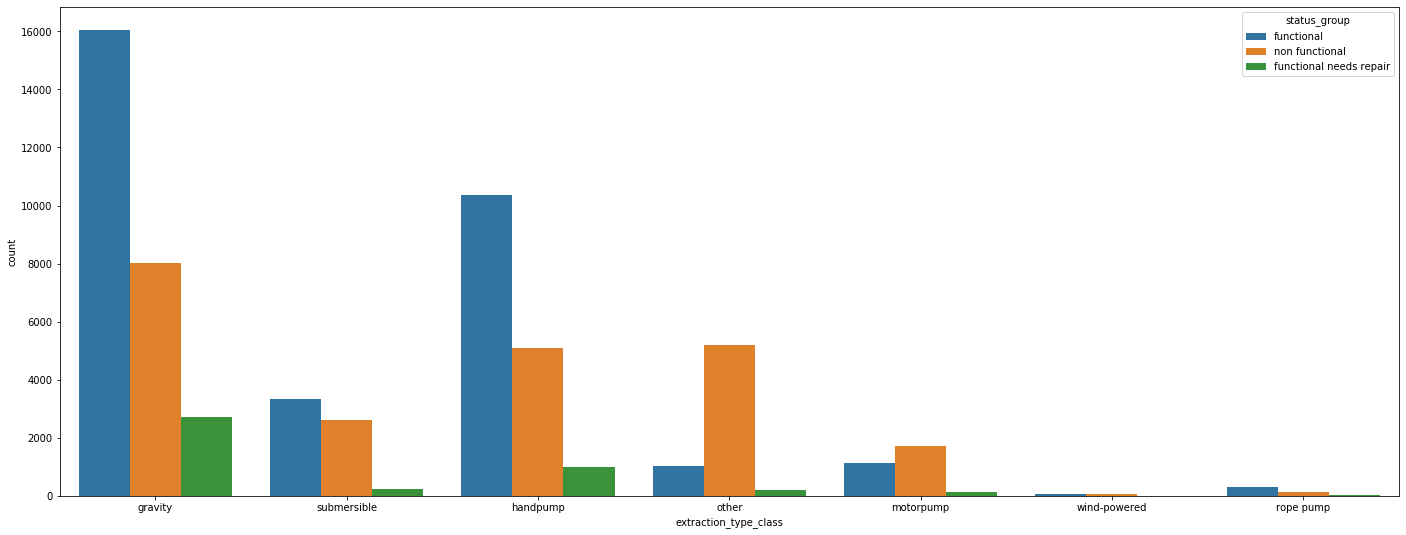

In [55]:
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='extraction_type_class',hue='status_group')

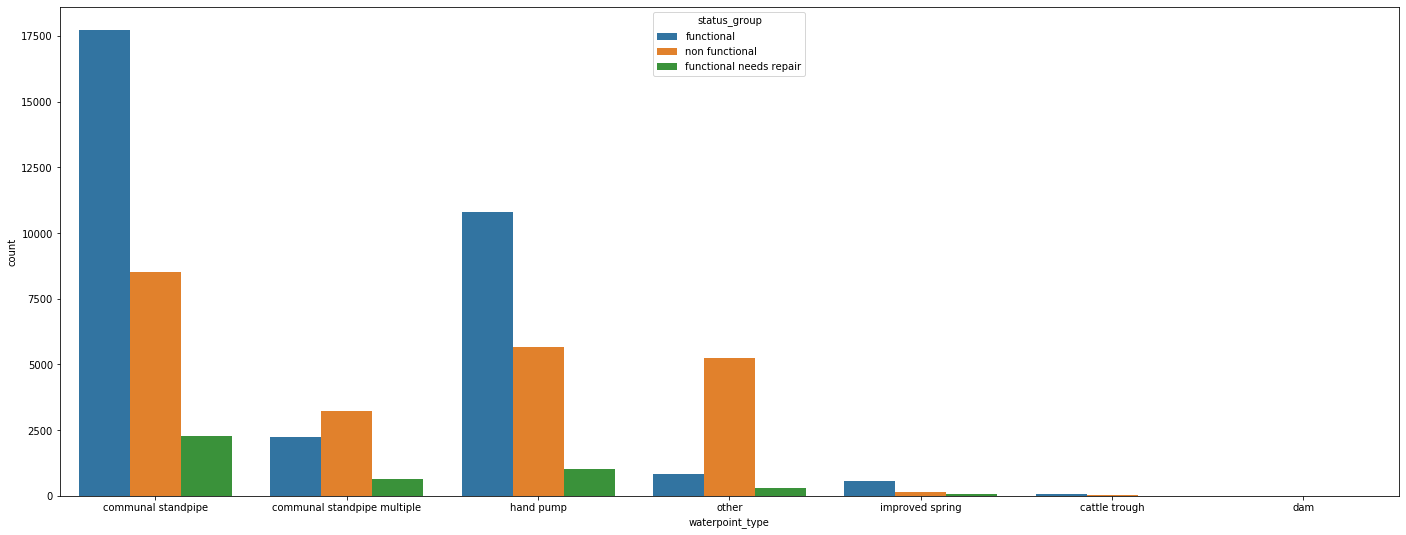

In [56]:
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='waterpoint_type',hue='status_group')

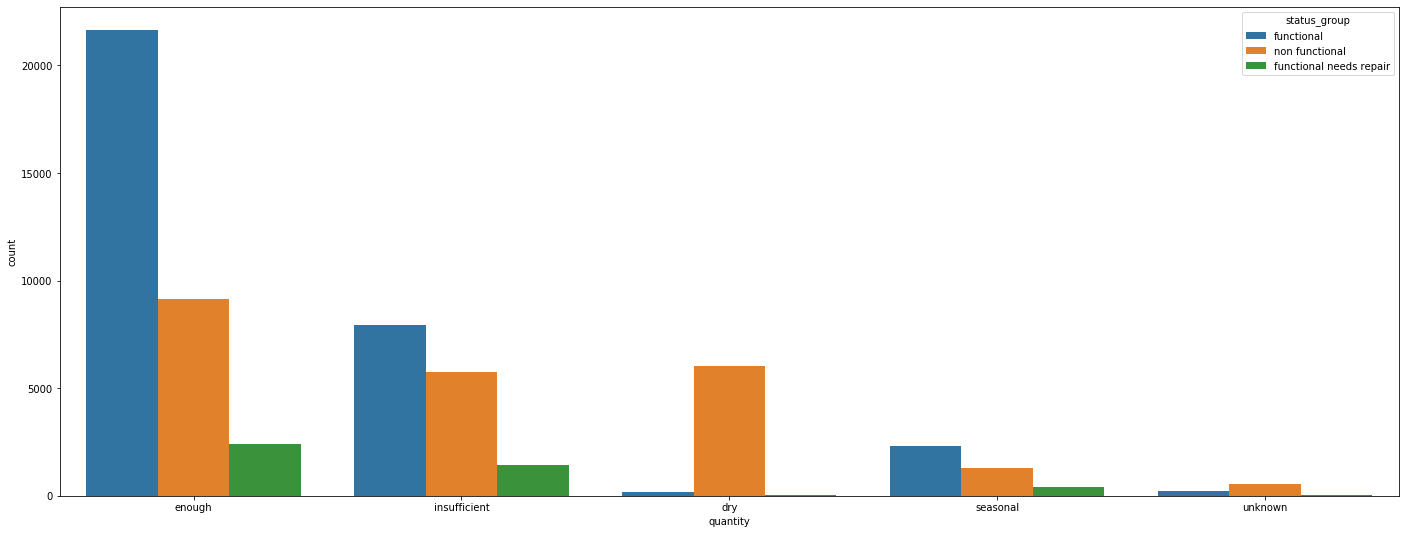

In [57]:
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='quantity',hue='status_group')

In [58]:
df[df['quantity']=='dry'].groupby(df['status_group']).size()

status_group
functional                  157
functional needs repair      37
non functional             6052
dtype: int64

In [59]:
df['longitude'].replace(0.0, np.nan, inplace=True)
df['latitude'].replace(0.0, np.nan, inplace=True)
df['construction_year'].replace(0.0, np.nan, inplace=True)

In [60]:
df.groupby(['district_code', 'region','construction_year']).size()

district_code  region         construction_year
1              Arusha         1980.0                 2
                              1990.0                23
                              2000.0               137
                              2010.0                24
               Dar es Salaam  1970.0                24
                              1990.0                 8
                              2000.0                11
                              2010.0                50
               Iringa         1964.0                 5
                              1972.0                 3
                              1974.0                 6
                              1976.0                 2
                              1978.0                13
                              1981.0                 1
                              1982.0                25
                              1983.0                44
                              1984.0                46
                 

In [61]:
df["latitude"].fillna(df.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
df["longitude"].fillna(df.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
df["longitude"].fillna(df.groupby(['region'])["longitude"].transform("mean"), inplace=True)
df["construction_year"].fillna(df.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df.groupby(['region'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df["construction_year"].median(), inplace=True)

In [62]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [63]:
#if water point is old, it is highly likely to be non functional or needs repair.
#New features were created namely number of days and number of months water point is operational.
print(df.date_recorded.head(5))
print(df.construction_year.head(5))

0    2011-03-14
1    2013-03-06
2    2013-02-25
3    2013-01-28
4    2011-07-13
Name: date_recorded, dtype: object
0    1999.0
1    2010.0
2    2009.0
3    1986.0
4    2003.0
Name: construction_year, dtype: float64


In [64]:
df['date_recorded'] = pd.to_datetime(df['date_recorded'])
df.date_recorded.head(5)
print(df.date_recorded.dt.year.head(5))
print(df.construction_year.head(5))
df['age'] = 2020 - df.construction_year
df.age.head(5)

0    2011
1    2013
2    2013
3    2013
4    2011
Name: date_recorded, dtype: int64
0    1999.0
1    2010.0
2    2009.0
3    1986.0
4    2003.0
Name: construction_year, dtype: float64


0    21.0
1    10.0
2    11.0
3    34.0
4    17.0
Name: age, dtype: float64

In [65]:
df[df['age']<0]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,age


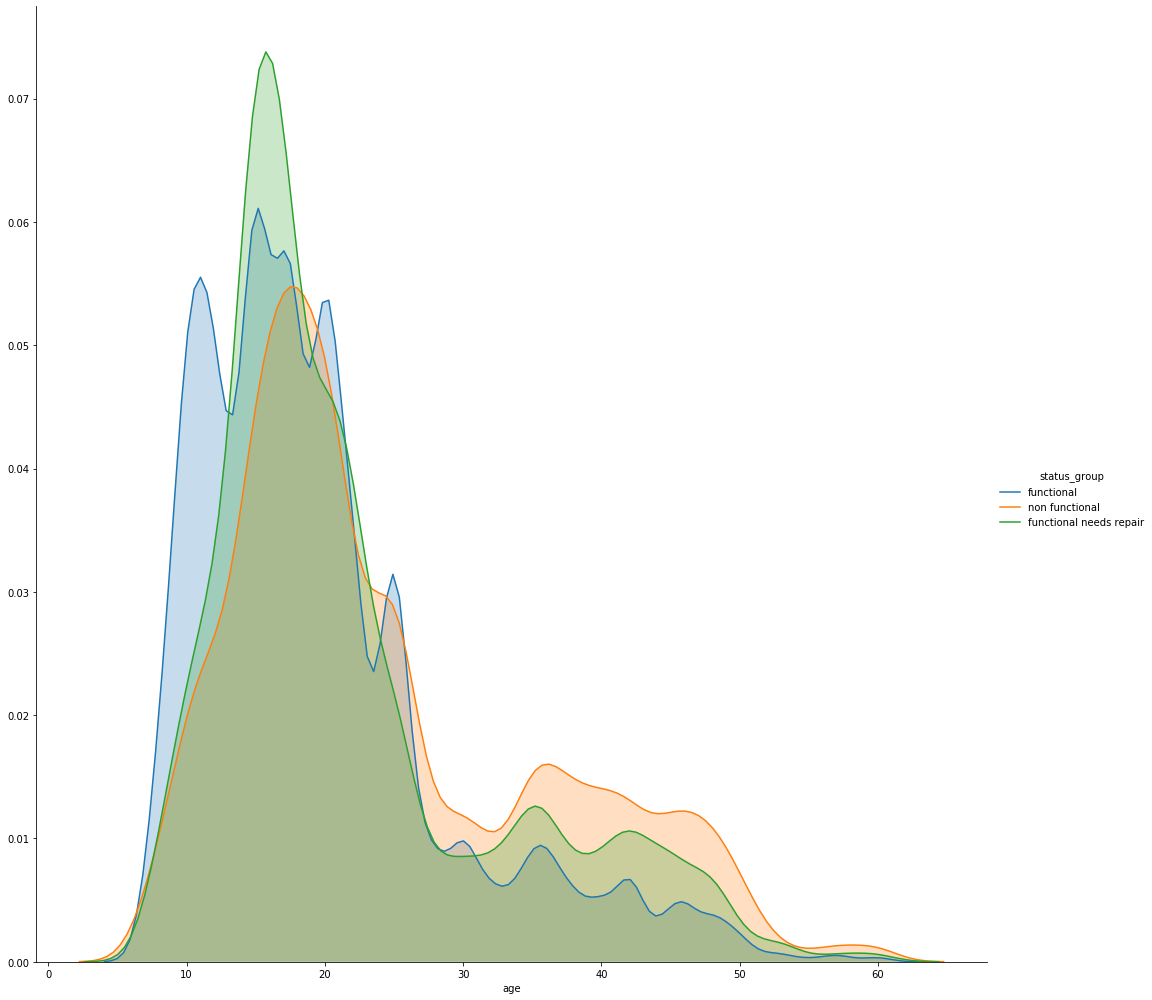

In [66]:
sns.FacetGrid(df, hue='status_group',height=14).map(sns.kdeplot, 'age', shade=True).add_legend()

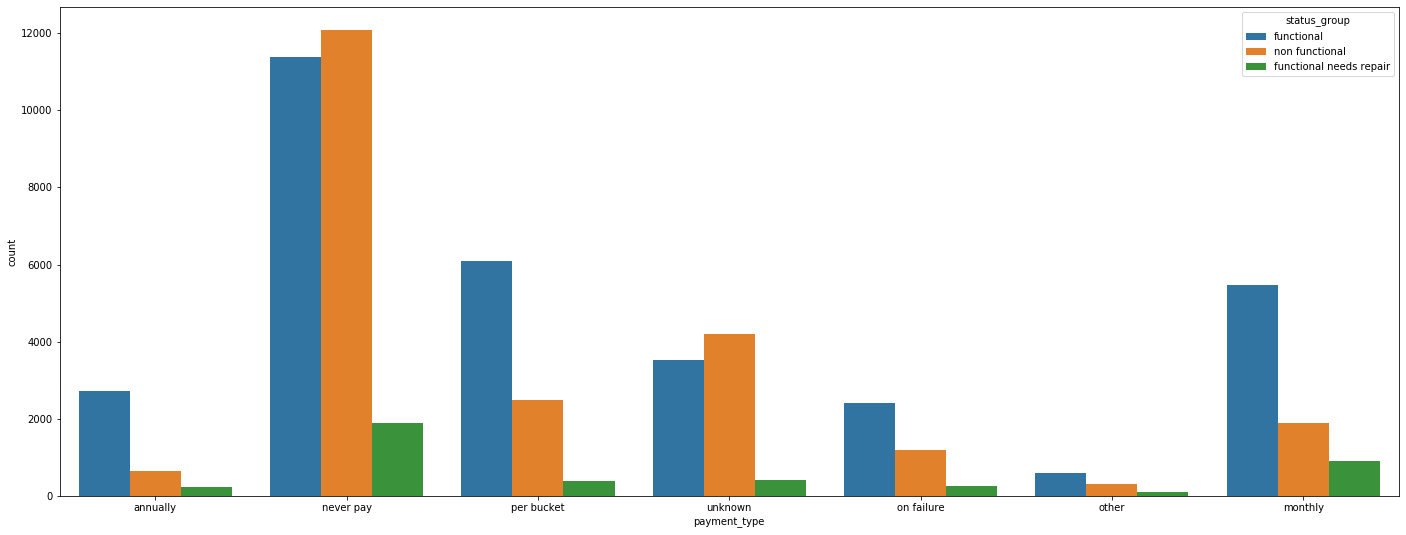

In [67]:
plt.figure(figsize=(24, 9))
sns.countplot(data=df,x='payment_type',hue='status_group')

In [68]:
# region and region_code are representing the same thing
garbage_features = ['wpt_name','num_private','subvillage','region_code','recorded_by']
df.drop(garbage_features,axis=1,inplace=True)

In [69]:
df.groupby(['management', 'management_group']).size()

management        management_group
company           commercial            685
other             other                 844
other - school    other                  99
parastatal        parastatal           1768
private operator  commercial           1971
trust             commercial             78
unknown           unknown               561
vwc               user-group          40507
water authority   commercial            904
water board       user-group           2933
wua               user-group           2535
wug               user-group           6515
dtype: int64

In [70]:
df.drop('management_group',axis=1,inplace=True)

In [71]:
df.groupby(['extraction_type_group','extraction_type_class','extraction_type']).size()

extraction_type_group  extraction_type_class  extraction_type          
afridev                handpump               afridev                       1770
gravity                gravity                gravity                      26780
india mark ii          handpump               india mark ii                 2400
india mark iii         handpump               india mark iii                  98
mono                   motorpump              mono                          2865
nira/tanira            handpump               nira/tanira                   8154
other                  other                  other                         6430
other handpump         handpump               other - mkulima/shinyanga        2
                                              other - play pump               85
                                              other - swn 81                 229
                                              walimi                          48
other motorpump        motorpump     

In [72]:
df.drop(['extraction_type_group', 'extraction_type_class'],axis=1,inplace=True)

In [73]:
df.groupby(['scheme_management', 'scheme_name']).size()

scheme_management  scheme_name                 
Company            BFFS                              1
                   Bagamoyo Wate                    60
                   Bagamoyo wate                   210
                   Borehole                          1
                   Borehole drilling project         1
                   Bulamba piped scheme              2
                   Burieni water supply              1
                   Doe water supply                  3
                   EKTM 2 water  supply              1
                   EKTM 2 water suply               25
                   EKTM 2 water supply               9
                   EKTM 3 water supply              51
                   Fufulamsuri water supply          1
                   GRUMETI                           6
                   HESAWA                            1
                   Hakwe water supply               10
                   Holili water supply              23
                 

In [74]:
df.drop('scheme_name',axis=1,inplace=True)

In [75]:
df.groupby(['payment', 'payment_type']).size()

payment                payment_type
never pay              never pay       25348
other                  other            1054
pay annually           annually         3642
pay monthly            monthly          8300
pay per bucket         per bucket       8985
pay when scheme fails  on failure       3914
unknown                unknown          8157
dtype: int64

In [76]:
df.drop('payment',axis=1,inplace=True)

In [77]:
df.groupby(['water_quality', 'quality_group']).size()

water_quality       quality_group
coloured            colored            490
fluoride            fluoride           200
fluoride abandoned  fluoride            17
milky               milky              804
salty               salty             4856
salty abandoned     salty              339
soft                good             50818
unknown             unknown           1876
dtype: int64

In [78]:
df.drop('quality_group',axis=1,inplace=True)

In [79]:
df.groupby(['quantity', 'quantity_group']).size()

quantity      quantity_group
dry           dry                6246
enough        enough            33186
insufficient  insufficient      15129
seasonal      seasonal           4050
unknown       unknown             789
dtype: int64

In [80]:
df.drop('quantity_group',axis=1,inplace=True)

In [81]:
df.groupby(['source', 'source_type', 'source_class']).size()

source                source_type           source_class
dam                   dam                   surface           656
hand dtw              borehole              groundwater       874
lake                  river/lake            surface           765
machine dbh           borehole              groundwater     11075
other                 other                 unknown           212
rainwater harvesting  rainwater harvesting  surface          2295
river                 river/lake            surface          9612
shallow well          shallow well          groundwater     16824
spring                spring                groundwater     17021
unknown               other                 unknown            66
dtype: int64

In [82]:
df.drop('source_type',axis=1,inplace=True)

In [83]:
df.groupby(['waterpoint_type', 'waterpoint_type_group']).size()

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough              116
communal standpipe           communal standpipe       28522
communal standpipe multiple  communal standpipe        6103
dam                          dam                          7
hand pump                    hand pump                17488
improved spring              improved spring            784
other                        other                     6380
dtype: int64

In [84]:
df.drop('waterpoint_type_group',axis=1,inplace=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 28 columns):
id                   59400 non-null int64
amount_tsh           59400 non-null float64
date_recorded        59400 non-null datetime64[ns]
funder               55765 non-null object
gps_height           59400 non-null float64
installer            55745 non-null object
longitude            59400 non-null float64
latitude             59400 non-null float64
basin                59400 non-null object
region               59400 non-null object
district_code        59400 non-null int64
lga                  59400 non-null object
ward                 59400 non-null object
population           59400 non-null float64
public_meeting       56066 non-null object
scheme_management    55523 non-null object
permit               56344 non-null object
construction_year    59400 non-null float64
extraction_type      59400 non-null object
management           59400 non-null object
payment_type       

In [86]:
df.groupby(['lga', 'ward','status_group']).size()

lga           ward        status_group           
Arusha Rural  Bangata     functional                 21
                          functional needs repair     2
                          non functional             10
              Bwawani     functional                 12
                          non functional             25
              Ilkiding'a  functional                 72
                          functional needs repair     1
                          non functional             13
              Kimnyaki    functional                 45
                          functional needs repair     7
                          non functional             27
              Kiranyi     functional                 84
                          non functional             31
              Kisongo     functional                 29
                          non functional              4
              Mateves     functional                 14
                          non functional              

In [87]:
df.drop('ward',axis=1,inplace=True)

In [88]:
df.groupby(['installer', 'funder']).size()

installer             funder                        
-                     Government Of Tanzania              2
                      Kalebejo Parish                     1
0                     0                                 777
A.D.B                 Hesawa                              1
AAR                   Aar                                 4
ABASIA                Abasia                             29
ABD                   Abd                                 1
ABDALA                Abdala                              1
ABDUL                 Abdul                               1
AC                    Action Aid                          2
ACORD                 Acord                               3
ACRA                  Acra                               46
                      Eu/acra                            18
                      Rc                                 39
                      Rc Church                         108
                      Roman Catholic           

In [89]:
df.drop('installer',axis=1,inplace=True)

In [90]:
df.isnull().sum()

id                      0
amount_tsh              0
date_recorded           0
funder               3635
gps_height              0
longitude               0
latitude                0
basin                   0
region                  0
district_code           0
lga                     0
population              0
public_meeting       3334
scheme_management    3877
permit               3056
construction_year       0
extraction_type         0
management              0
payment_type            0
water_quality           0
quantity                0
source                  0
source_class            0
waterpoint_type         0
status_group            0
age                     0
dtype: int64

In [91]:
df.drop('public_meeting', axis=1, inplace=True)
df.drop('permit', axis=1, inplace=True)

In [92]:
#For every categorical response, convert the levels to lower case, in case there is random capitalization

df.waterpoint_type = df.waterpoint_type.str.lower()
df.funder = df.funder.str.lower()
df.basin = df.basin.str.lower()
df.region = df.region.str.lower()
df.source = df.source.str.lower()
df.lga = df.lga.str.lower()
df.management = df.management.str.lower()
df.quantity = df.quantity.str.lower()
df.water_quality = df.water_quality.str.lower()
df.payment_type=df.payment_type.str.lower()
df.extraction_type=df.extraction_type.str.lower()

In [93]:
df["funder"].fillna("other", inplace=True)
df["scheme_management"].fillna("other", inplace=True)

In [94]:
df.isnull().sum()

id                   0
amount_tsh           0
date_recorded        0
funder               0
gps_height           0
longitude            0
latitude             0
basin                0
region               0
district_code        0
lga                  0
population           0
scheme_management    0
construction_year    0
extraction_type      0
management           0
payment_type         0
water_quality        0
quantity             0
source               0
source_class         0
waterpoint_type      0
status_group         0
age                  0
dtype: int64

In [95]:
df.drop(['date_recorded','construction_year'], axis=1, inplace=True)

In [96]:
df.isnull().sum()

id                   0
amount_tsh           0
funder               0
gps_height           0
longitude            0
latitude             0
basin                0
region               0
district_code        0
lga                  0
population           0
scheme_management    0
extraction_type      0
management           0
payment_type         0
water_quality        0
quantity             0
source               0
source_class         0
waterpoint_type      0
status_group         0
age                  0
dtype: int64

In [97]:
df.shape

(59400, 22)